### This file decribes how to get scrape a working csv-file from wikinews.org

# IT NEED A LOT OF STUFF NOT IMPLEMENTED COMPLITELY

Table taken from: https://github.com/several27/FakeNewsCorpus - go there for better table formating

| Type | Tag | Count (so far) | Description|
| ------------- |-------------|:-------------:|:-------------:|
| **Fake News** | fake | 928,083 | Sources that entirely fabricate information, disseminate deceptive content, or grossly distort actual news reports |
| **Satire** | satire | 146,080 | Sources that use humor, irony, exaggeration, ridicule, and false information to comment on current events. |
| **Extreme Bias** | bias | 1,300,444 | Sources that come from a particular point of view and may rely on propaganda, decontextualized information, and opinions distorted as facts. |
| **Conspiracy Theory** | conspiracy | 905,981 | Sources that are well-known promoters of kooky conspiracy theories. |
| **State News** | state | 0 | Sources in repressive states operating under government sanction. |
| **Junk Science** | junksci | 144,939 | Sources that promote pseudoscience, metaphysics, naturalistic fallacies, and other scientifically dubious claims. |
| **Hate News** | hate | 117,374 | Sources that actively promote racism, misogyny, homophobia, and other forms of discrimination. |
| **Clickbait** | clickbait | 292,201 | Sources that provide generally credible content, but use exaggerated, misleading, or questionable headlines, social media descriptions, and/or images. |
| **Proceed With Caution** | unreliable | 319,830 | Sources that may be reliable but whose contents require further verification. |
| **Political** | political | 2,435,471 | Sources that provide generally verifiable information in support of certain points of view or political orientations. |
| **Credible** | reliable | 1,920,139 | Sources that circulate news and information in a manner consistent with traditional and ethical practices in journalism (Remember: even credible sources sometimes rely on clickbait-style headlines or occasionally make mistakes. No news organization is perfect, which is why a healthy news diet consists of multiple sources of information). |

In [2]:
# Follow the link below:
# https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing
# https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/



import psycopg2
# import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string

### Import and get basic information about the data

First we import the data and get an idea about how it it structured and so on such that we can better understand what has to be done.

- Below we import and create a type_id colum (might remove later)


In [18]:
### Import data and setup dataframe ###

# usage: specify file location
filepath = '../Data_git_ignore/clean_csv/clean_corpus.csv'
# filepath = '../Data_git_ignore/clean-100k.csv'

# Create df for the entire file
entire_df = pd.read_csv(filepath, index_col = [0])


### Below are overall integrity cleaning ###

# content has to be unique
entire_df = entire_df.drop_duplicates(['content'])

# id has to be unique
entire_df = entire_df.drop_duplicates(['id'])

# Create type_id column
entire_df['type_id'] = entire_df.groupby(['type']).ngroup()

# Show info about enire dataset
entire_df

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,type_id,content_token
1496,338715.0,theinternetpost.net,fake,https://theinternetpost.net/tag/global-war/,URL URL URL URL morenullhere shar...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,THENULLINTERNETNULLPOST,NaN,NaN,NaN,PostsNULLaboutNULLGlobalNULLWarNULLwrittenNULL...,"globalNULLconflict,NULLwarNULLonNULLterror,NUL...",NaN,NaN,0,"['URL', 'URL', 'URL', 'URL', 'morenullhere', '..."
8192,30948.0,beforeitsnews.com,fake,http://beforeitsnews.com/spirit/2013/06/more-t...,morenullthannullanullparadenullandnullmynullne...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"MoreNULLthanNULLaNULLparade,NULLandNULLmyNULLn...",LisaNULLBeckNULLLiving,NaN,NaN,NaN,NaN,NaN,NaN,0,['morenullthannullanullparadenullandnullmynull...
5154,819308.0,beforeitsnews.com,fake,http://beforeitsnews.com/international/2013/01...,dallasnullgunnullbuybacknullprogramnullcounter...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,DallasNULLGunNULLBuybackNULLProgramNULLCounter...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,['dallasnullgunnullbuybacknullprogramnullcount...
2272,339605.0,theinternetpost.net,fake,https://theinternetpost.net/tag/free-trade-area/,bynullpaulnulljnullballes URL accordingnul...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,THENULLINTERNETNULLPOST,NaN,NaN,NaN,PostsNULLaboutNULLFreeNULLtradeNULLareaNULLwri...,"employment,NULLFreeNULLtradeNULLagreement,NULL...",NaN,NaN,0,"['bynullpaulnulljnullballes', 'URL', 'accordin..."
2198,24651.0,beforeitsnews.com,fake,http://beforeitsnews.com/business/2015/11/ente...,enterprisenullvsatnullmarketnullglobalnullrese...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,EnterpriseNULLVSATNULLMarketNULLGlobalNULLRese...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,['enterprisenullvsatnullmarketnullglobalnullre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,411807.0,christianpost.com,reliable,https://www.christianpost.com/news/trump-evang...,URL URL URL whilenullthenulluniversit...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,EvangelicalNULLChristianNULLCollegeNULLPreside...,NaN,NaN,NaN,OklahomaNULLWesleyanNULLUniversityNULLpresiden...,NaN,NaN,NaN,1,"['URL', 'URL', 'URL', 'whilenullthenullunivers..."
1986,989356.0,christianpost.com,reliable,https://www.christianpost.com/news/help-us-pus...,thenullviewsnullexpressednullbynullthenullauth...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,HelpNULLUsNULLPushNULLBackNULLAgainstNULLYouTu...,NaN,NaN,NaN,WouldNULLyouNULLlikeNULLtoNULLcomeNULLbehindNU...,NaN,NaN,NaN,1,['thenullviewsnullexpressednullbynullthenullau...
5316,931042.0,christianpost.com,reliable,https://www.christianpost.com/news/4-reasons-w...,URL expandnullnullcollapse URL URL ...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,4NULLReasonsNULLWhyNULLChristianNULLSchoolsNUL...,NaN,NaN,NaN,MoreNULLoftenNULLthanNULLnotNULLschoolsNULLare...,NaN,NaN,NaN,1,"['URL', 'expandnullnullcollapse', 'URL', 'URL'..."
1773,36044.0,consortiumnews.com,reliable,https://consortiumnews.com/2015/03/24/ukraines...,exclusivenullukrainesnullpostcoupnullregimenul...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Ukraine’sNULLOligarchsNULLTurnNULLonNULLEachNU...,"ChetNULLRoman,NULLZacharyNULLSmith,NULLDenisNU...",NaN,NaN,NaN,"Ukraine,NULLRobertNULLParry,NULLPetroNULLPoros...",NaN,NaN,1,['exclusivenullukrainesnullpostcoupnullregimen...


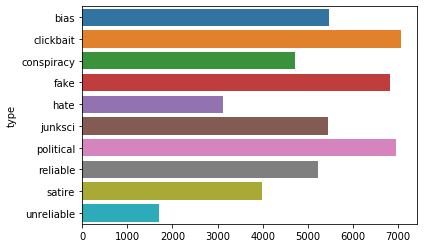

In [16]:
### Show info about dataset ###

# Show rows for each type
types = entire_df.groupby('type').content.count()
sns.barplot(types.values, types.index)



In [5]:
### SELECT SIZE OF SUB-DATASET ###

# This can generate a dataset with random purmutation and a max size for each type(can be smaller if desired max is not possible)

# max size for type
max_size = 50
# Labels to include - ['fake', 'satire', 'bias', 'conspiracy', 'state', 'junksci', 'hate', 'clickbait', 'unreliable', 'political', 'reliable'] - all labels
use_types = ['fake', 'satire', 'bias', 'conspiracy', 'junksci', 'hate', 'clickbait', 'unreliable', 'political', 'reliable']
# Random seed
rnd = 1

# initialize dataframes
df = pd.DataFrame(columns = entire_df.columns)

# add type to test splits
for t in use_types:

    # type size
    type_size = entire_df['type'].loc[entire_df['type'] == t].value_counts().min()

    # set size of type slice
    if type_size < max_size:
        tmp = entire_df.loc[entire_df['type'] == t].sample(n = type_size, random_state=rnd)
    else:
        tmp = entire_df.loc[entire_df['type'] == t].sample(n = max_size, random_state=rnd)
    
    # add tmp to dataframes
    df = pd.concat([df, tmp])
    
    # print split shape
    print("=>", t, tmp.shape)

print("\n[Final split]\nwhole ==>", df.shape)

=> fake (50, 17)
=> satire (50, 17)
=> bias (50, 17)
=> conspiracy (50, 17)
=> junksci (50, 17)
=> hate (50, 17)
=> clickbait (50, 17)
=> unreliable (50, 17)
=> political (50, 17)
=> reliable (50, 17)

[Final split]
whole ==> (500, 17)


,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,meta_keywords,meta_description,tags,type_id
count,500,500,500,500,500,500,500,500,274,500,203,220,500
unique,94,10,500,500,2,1,1,478,217,53,180,163,10
missing,0,0,0,0,0,0,0,0,226,0,297,280,0


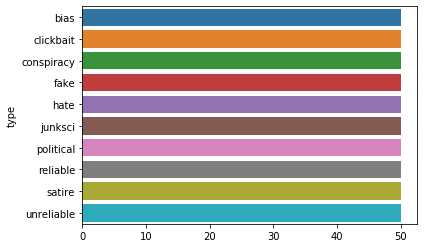

In [6]:
### Show info about sub-dataset ###

# Show rows for each type
types = df.groupby('type').content.count()
sns.barplot(types.values, types.index)

# Show descibe data
describe_df = df.describe(include=[np.object]).head(2)
nan_df = df.isna().sum()
describe_df.loc['missing'] = nan_df
describe_df

In [7]:
df['meta_keywords'].unique()

array(["['']", "['Daniel Wood']",
       "['US prison deprives Victor Bout of right to have phone calls with family - wife', 'Russia', 'US', 'human rights', 'Victor Bout', 'prison', 'Russian citizens']",
       '[\'Durian fruit comes to Britain: "You either love it or hate it"\', \'Fruit\', \'durian\', \'Malaysia\', \'food\']',
       "['ΑΝΤΙΠΟΙΝΑ ΤΗΣ ΆΓΚΥΡΑΣ ΣΤΟ ΒΕΡΟΛΙΝΟ: ΜΕ ΕΝΤΟΛΗ ΕΡΝΤΟΓΑΝ ΑΥΣΤΗΡΟΤΕΡΟΙ ΕΛΕΓΧΟΙ ΣΕ ΓΕΡΜΑΝΟΥΣ ΔΙΠΛΩΜΑΤΕΣ']",
       "['Mundialismo', 'Inmigración', 'Ideología de Género', 'Libertad de expresión', 'LGBT', 'Refugiados', 'Multiculturalismo']",
       '[\'withdrawal\', "Syrian opposition\'s High Negotiations Committee (HNC)", \'Russia\', \'Syria\']',
       "['Россия', 'Индия', 'БРИКС', 'договора', 'военное сотрудничество', 'энергетика', 'визит', 'Путин']",
       "['Media Bias', '', 'Gallup', 'Mainstream Media']",
       "['rescue plan', 'floods', 'victims', 'India', 'Bihar']",
       "['row', 'drills', 'Turkey', 'Qatar']",
       "['private prisons', 'Black L

In [8]:
### REMOVE AND REPLACE NAN ###

# Remove rows where columns are NaN
df.dropna(subset=['title'])

# Replace NaN-elements with 'NULL'
df = df.fillna('NULL')

# Replace 
regex = r"\[''\]"
df['meta_keywords'] = df['meta_keywords'].replace(to_replace=regex, value='NULL', regex=True)



In [9]:
df.authors.unique()

array(['Mary Jacobs', 'Layers Of Thought', "Maggie, Maggie'S Notebook",
       'Cop Block', 'Due Diligence', 'NULL', 'Redon Files', 'Nhs Choices',
       'Religion In American History Blog', 'Eyes For You',
       'Global Economic Intersection', 'Science',
       'National Football Authority', 'Wake Up World', 'Forex Cycle',
       'Century Wire', 'Marler Blog', 'Alexander Higgins',
       'An Average American Patriot', 'Zacks Investment Research',
       'Marco Senate', 'Reason Magazine', 'Investment U',
       'Voice Of Reason', 'Monkeys, Mountains', 'Trading Goddess',
       'Center For Democracy', 'Bleeding Yankee Blue', 'Babbling Books',
       'Alton Parrish', 'Everything Finance', 'Jack Blood', 'John Ale',
       'Lisa Haven', 'Http, Sbctoday.Com', 'Deborah Dupre',
       'Chip Cravaack For Congress', 'Julie Zickefoose',
       'Gannon On Investing',
       'Blasting News, Lawrence Lease, Robert Sobel',
       'Blasting News, Kendall Thomas, Lindsay Cronin, Hailey Jones',
      

In [10]:
df.meta_keywords.unique()

array(['NULL', "['Daniel Wood']",
       "['US prison deprives Victor Bout of right to have phone calls with family - wife', 'Russia', 'US', 'human rights', 'Victor Bout', 'prison', 'Russian citizens']",
       '[\'Durian fruit comes to Britain: "You either love it or hate it"\', \'Fruit\', \'durian\', \'Malaysia\', \'food\']',
       "['ΑΝΤΙΠΟΙΝΑ ΤΗΣ ΆΓΚΥΡΑΣ ΣΤΟ ΒΕΡΟΛΙΝΟ: ΜΕ ΕΝΤΟΛΗ ΕΡΝΤΟΓΑΝ ΑΥΣΤΗΡΟΤΕΡΟΙ ΕΛΕΓΧΟΙ ΣΕ ΓΕΡΜΑΝΟΥΣ ΔΙΠΛΩΜΑΤΕΣ']",
       "['Mundialismo', 'Inmigración', 'Ideología de Género', 'Libertad de expresión', 'LGBT', 'Refugiados', 'Multiculturalismo']",
       '[\'withdrawal\', "Syrian opposition\'s High Negotiations Committee (HNC)", \'Russia\', \'Syria\']',
       "['Россия', 'Индия', 'БРИКС', 'договора', 'военное сотрудничество', 'энергетика', 'визит', 'Путин']",
       "['Media Bias', '', 'Gallup', 'Mainstream Media']",
       "['rescue plan', 'floods', 'victims', 'India', 'Bihar']",
       "['row', 'drills', 'Turkey', 'Qatar']",
       "['private prisons', 'Black L

### Tokeniztion for futhere cleaning - slow step?

### Dataset Preparation

Here we start the cleaning process. There are a lot of steps and the code can be a little complicated. Some steps have to be before others as they overrule the previous 

- how to implement is still up for debate as it can be smart to use small cells for each step or get all in one big cleaning step but display when they are done
- **READ** all excersice 1-7 on KU

### Common data cleaning steps
- make text all lower case
- remove puntuiation
- remove numerical values
- remove common non-sensial text(/n)
- tokanize text

### # steps that need to be included
- -NUM -DATE -EMAIL -URL
- replace nan with 'NULL'

### Text blob cleaning
The first cleaning-step is wokring on text blobs ie. all text at the same time

In [11]:
# working with content as a series
series_content = df['content']

### DEBUG SETUP - COMPARE CLEAN VS NON_CLEAN ###
sample_num = 3
before = series_content.iloc[sample_num]
### DEBUG SETUP - COMPARE CLEAN VS NON_CLEAN ###

### Order matters - (not final order of pipeline)
### Overall preprocessing

# lower_cast - NEEDED? - DONE by many libs
%time print("\n (lower_cast)"); series_content = series_content.str.lower()

### replace [name] with tokens in text ###

# Email_replace
regexEmail = r"[a-zA-Z_-]+@[a-zA-Z_-]+(?:\.[a-zA-Z]{2,4}){1,3}"
%time print("\n (Email_replace)"); series_content = series_content.replace(to_replace=regexEmail, value=' <EMAIL> ', regex=True)

# replace URLs  with token
regexURL= r"(?:https?:\/\/)?(?:www\.)?([^@\s]+\.[a-zA-Z]{2,4})[^\s]*"
%time print("\n (URL_replace)"); series_content = series_content.replace(to_replace=regexURL, value=' <URL> ', regex=True)

# HTML_replace
regexHTML = r"<\s*a[^>]*>(.*?)<\s*/\s*a>"
%time print("\n (HTML_replace)"); series_content = series_content.replace(to_replace=regexHTML, value=' <HTML> ', regex=True)

# Date_replace - NOT DONE
# - name         (jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)
# - day in month ([12]\d|3[01]|0?[1-9]) - Day 0-31
# - year         ([12][0-9]{3})         - Years from 1000 to 2999
regexDate = r"(((19[7-9]\d|20\d{2})|(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?)|(([12][0-9])|(3[01])|(0?[1-9])))[\/. \-,\n]){2,3}"
%time print("\n (Date_replace)"); series_content = series_content.replace(to_replace=regexDate, value=' <DATE> ', regex=True)

# Number_replace
regexNum = r"[0-9][0-9,\.]+" # nums with [0-9] and [,.]
series_content = series_content.replace(to_replace=regexNum, value=' <NUM> ', regex=True)

### string removal functions ###
# New_line_remove
regexNEWLINE = r"\n|\\n"
%time print("\n (New_line_remove)"); series_content = series_content.replace(to_replace=regexNEWLINE, value=' ', regex=True)

# Punctuation_remove
regexPunkt = r"[!“”\"#$%&()*+,\-–.…\/:;<=>?@[\\\]^_`{|}~'\’\']" # also removes: " ' " which means ie. it's -> its - remove \' from regwex if not needed
%time print("\n (Punctuation_remove)"); series_content = series_content.replace(to_replace=regexPunkt, value='', regex=True)

# Non_ASCII_remove - Maybe a step too much
%time print("\n (Non_ASCII_remove)"); series_content = series_content.str.encode('ascii', 'ignore').str.decode('ascii')

# After all steps
print("\n (Done cleaning)")

### DEBUG PRINT - COMPARE CLEAN VS NON_CLEAN ###
print("[before]\n", repr(before), "\n\n[After]\n", repr(series_content.iloc[sample_num]) )
### DEBUG PRINT - COMPARE CLEAN VS NON_CLEAN ###


 (lower_cast)
Wall time: 9.97 ms

 (Email_replace)
Wall time: 55 ms

 (URL_replace)
Wall time: 234 ms

 (HTML_replace)
Wall time: 992 µs

 (Date_replace)
Wall time: 373 ms

 (New_line_remove)
Wall time: 12 ms

 (Punctuation_remove)
Wall time: 25 ms

 (Non_ASCII_remove)
Wall time: 2.97 ms

 (Done cleaning)
[before]
 'Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nOriginally posted by Kevin Jackson to Cop-Reports.com.\n\nI was walking down S. Kihei Rd. in Kihie, HI. when I noticed a truck pulling in to the Rodeo General Store with several unmarked MPD vehicles pulling in after him. With recent events and the known corruption of the MPD, I began to record the encounter.\n\nI began by recording the truck, all of the MPD vehicles and their tags. At first, the police did not seem to mind me filming and adding audio comments. I then began to describe the attire of the MPD as “militarized.” About then, I began to engage with the driver being cited for wha

In [12]:
# tokenization and furthur cleaning

# This step might be much slower and therfore the least work should be done here

# tokenize text
token_list_series = series_content.str.split()

## Cleaning for other colums

In [13]:
# to-do add case for words line Niel's thois is pt transalted into Niels

# Clean meta keywords representation
regexStrList = r"\["
df['meta_keywords'] = df['meta_keywords'].replace(to_replace=regexStrList, value='{', regex=True)
regexStrList = r"\]"
df['meta_keywords'] = df['meta_keywords'].replace(to_replace=regexStrList, value='}', regex=True)

## insert and write csv

In [14]:
# inset all changes and write csv file

#df['content'] = series_content

# write csv
#df.to_csv('../Data_git_ignore/clean_corpus.csv', index=True, header=True)

df.to_csv('../Data_git_ignore/clean_corpus.csv', index=True, header=True)

# BELOW IS JUNK BUT DON*T DELETE

In [12]:
# series_content[series_content['content'].apply(regexDate)]

df =series_content.str.extract(r"(?:https?:\/\/)?(?:www\.)?([^@\s]+\.[a-zA-Z]{2,4})[^\s]*").isnull()

In [13]:
df1['mask'] = series_content.str.contains('(\d+[A-Z]+\d+)')


NameError: name 'df1' is not defined

In [14]:
pat = r"(?:https?:\/\/)?(?:www\.)?([^@\s]+\.[a-zA-Z]{2,4})[^\s]*"
df_bool = series_content.str.contains(pat)

In [15]:
result = pd.DataFrame(series_content.str.extract(r'([\d]+)',expand=False))


In [16]:
from time import perf_counter 
t1_start = perf_counter()  
# replace URLs  with token
regexURL= r"(?:https?:\/\/)?(?:www\.)?([^@\s]+\.[a-zA-Z]{2,4})[^\s]*"
series_content = series_content.replace(to_replace=regexURL, value='<URL>', regex=True)

# Stop the stopwatch / counter 
t1_stop = perf_counter() 
  
print("Elapsed time:", t1_stop, t1_start)  

Elapsed time: 7.1143198 7.0204658


In [17]:
import time
 
class MeasureDuration:
    def __init__(self):
        self.start = None
        self.end = None
 
    def __enter__(self):
        self.start = time.time()
        return self
 
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time.time()
        print("Total time taken: %s" % self.duration())
 
    def duration(self):
        return str((self.end - self.start) * 1000) + ' milliseconds'

In [18]:
from time import time

class Timer():
    def __init__(self, message):
        self.message = message
    def __enter__(self):
        self.start = time()
        return None  # could return anything, to be used like this: with Timer("Message") as value:
    def __exit__(self, type, value, traceback):
        elapsed_time = (time() - self.start) * 1000
        print(self.message.format(elapsed_time))

In [19]:
df = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [5, 6, 7, 8]})

# runs on single core
df['x2'] = df['x'].apply(lambda x: x**2)
# runs on multiple cores
df['x2'] = df['x'].swifter.apply(lambda x: x**2)

AttributeError: 'Series' object has no attribute 'swifter'

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.content).toarray()
labels = df.type_id
features.shape

AttributeError: 'DataFrame' object has no attribute 'content'

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['type_id'], df['content'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)clf = MultinomialNB().fit(X_train_tfidf, y_train)

SyntaxError: invalid syntax (<ipython-input-21-8ae1abe34dc4>, line 10)

In [22]:
def remove_stopwords(text): # words like 'the', 'a', 'me' - SLOW
    """custom function to remove the stopwords"""
    STOPWORDS = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# def lower_cast(series_in): # Maybe not needed - lower casing is DONE my most of the modern day vecotirzers and tokenizers
#     """Lower Casing"""
#     return series_in.str.lower()

# def Email_replace(series_in):
#     """Replace emails with token"""
#     regexEmail = r"[a-zA-Z_-]+@[a-zA-Z_-]+(?:\.[a-zA-Z]{2,4}){1,3}"
#     return series_in.replace(to_replace=regexEmail, value='<EMAIL>', regex=True)

# def HTML_replace(series_in):
#     """REpalce HTML wiith token"""
#     regexHTML = r"<\s*a[^>]*>(.*?)<\s*/\s*a>"
#     return series_in.replace(to_replace=regexHTML, value='<HTML>', regex=True)

# def Date_replace(series_in): # NOT WORKING PROBABLY - needs to be recreated
#     """Replace dates with token"""
#     # name         (jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)
#     # day in month ([12]\d|3[01]|0?[1-9]) - Day 0-31
#     # year         ([12][0-9]{3})         - Years from 1000 to 2999
#     regexDate = r"(((19[7-9]\d|20\d{2})|(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?)|(([12][0-9])|(3[01])|(0?[1-9])))[\/. \-,\n]){2,3}"
#     return series_in.replace(to_replace=regexDate, value='<DATE>', regex=True)

# def Number_replace(series_in): 
#     """Replace numbers with token"""
#     regexNum = r"[0-9][0-9,\.]+" # type of nums with [0-9] and [,.]
#     return series_in.replace(to_replace=regexNum, value='<NUM>', regex=True)

# def End_of_line_remove(series_in):
#     """Remove end_of_line \n"""
#     regexNL = r"(\\n)"
#     return series_in.replace(to_replace=regexNL, value=' ', regex=True)

# def Punctuation_remove(series_in): 
#     """Remove punctuations"""
#     regexPunkt = r"[!“”\"#$%&()*+,\-–.\/:;<=>?@[\\\]^_`{|}~'\’\']" # also removes: " ' " which means ie. it's -> its - remove \' from regex if not needed
#     series_in.replace(to_replace=regexPunkt, value='', regex=True)


## clean wiki

In [24]:
# importing and creating df (has to have type_id)

# usage: specify file location, sample size and seed(used by random) 
filepath = '../Data_sample/wiki_news_raw_backup.csv' # 250 rows of FakeNewsCorpus
s = 3679                                            # desired sample size
seed = 1                                           # seed used by Pseudorandom number generator

df = pd.read_csv(filepath, index_col = [0]).sample(n=s, random_state=seed)
df["content"] = df["content"].astype(str)

df.head()

,categories,content,publish_date,scraped_at,source_urls,sources_domain_urls,title
article_url,,,,,,,
https://en.wikinews.org/wiki/Namibia_votes_in_presidential_election,"November 28, 2009,Namibia,Published,Elections,...",\r\n Voters are heading to the polls today in ...,"November 28, 2009",2020-04-23,http://www1.voanews.com/english/news/africa/27...,"/wiki/VOA_News,/wiki/Associated_Press",Namibia votes in presidential election
https://en.wikinews.org/wiki/Scientology_defector_arrested_after_attempting_to_leave_organization,"October 9, 2010,Religion,Scientology,Published...",\r\n Recent reports have revealed that a defec...,"October 9, 2010",2020-04-22,http://newsfeed.time.com/2010/10/09/scientolog...,"/wiki/TIME,https://en.wikipedia.org/wiki/LA_We...",Scientology defector arrested after attempting...
https://en.wikinews.org/wiki/Nobel_laureate_Doris_Lessing:_9/11_%27wasn%27t_that_terrible%27_compared_to_IRA_attacks,"October 22, 2007,Published,Archived,United Kin...","\r\n British writer Doris Lessing , recipien...","October 22, 2007",2020-04-22,http://www.ctv.ca/servlet/ArticleNews/story/CT...,"https://en.wikipedia.org/wiki/CTV.ca,https://e...",Nobel laureate Doris Lessing: 9/11 'wasn't tha...
https://en.wikinews.org/wiki/No-fly_zone_demanded_by_Syrian_protesters,"October 29, 2011,Published,Archived,Syria,Midd...",\r\n Friday saw protests across Syria callin...,"October 29, 2011",2020-04-22,http://www.bbc.co.uk/news/world-middle-east-15...,"/wiki/BBC_News_Online,/wiki/Agence_France-Pres...",No-fly zone demanded by Syrian protesters
https://en.wikinews.org/wiki/Romanian_oil_company_claims_Iran_has_seized_one_of_its_rigs,"August 22, 2006,Published,AutoArchived,World,P...",\r\n An Orizont oil platform in the Persian G...,"August 22, 2006",2020-04-22,http://www.bloomberg.com/apps/news?pid=2060108...,"https://en.wikipedia.org/wiki/Bloomberg,/wiki/...",Romanian oil company claims Iran has seized on...


In [25]:
# working with content as a series
series_content = df['content']

### DEBUG SETUP - COMPARE CLEAN VS NON_CLEAN ###
sample_num = 3
before = series_content.iloc[sample_num]
### DEBUG SETUP - COMPARE CLEAN VS NON_CLEAN ###

### Order matters - (not final order of pipeline)
### Overall preprocessing

# lower_cast - NEEDED? - DONE by many libs
%time print("\n (lower_cast)"); series_content = series_content.str.lower()

### replace [name] with tokens in text ###

# Email_replace
regexEmail = r"[a-zA-Z_-]+@[a-zA-Z_-]+(?:\.[a-zA-Z]{2,4}){1,3}"
%time print("\n (Email_replace)"); series_content = series_content.replace(to_replace=regexEmail, value=' <EMAIL> ', regex=True)

# replace URLs  with token
regexURL= r"(?:https?:\/\/)?(?:www\.)?([^@\s]+\.[a-zA-Z]{2,4})[^\s]*"
%time print("\n (URL_replace)"); series_content = series_content.replace(to_replace=regexURL, value=' <URL> ', regex=True)

# HTML_replace
regexHTML = r"<\s*a[^>]*>(.*?)<\s*/\s*a>"
%time print("\n (HTML_replace)"); series_content = series_content.replace(to_replace=regexHTML, value=' <HTML> ', regex=True)

# Date_replace - NOT DONE
# - name         (jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)
# - day in month ([12]\d|3[01]|0?[1-9]) - Day 0-31
# - year         ([12][0-9]{3})         - Years from 1000 to 2999
regexDate = r"(((19[7-9]\d|20\d{2})|(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?)|(([12][0-9])|(3[01])|(0?[1-9])))[\/. \-,\n]){2,3}"
%time print("\n (Date_replace)"); series_content = series_content.replace(to_replace=regexDate, value=' <DATE> ', regex=True)

# Number_replace
regexNum = r"[0-9][0-9,\.]+" # nums with [0-9] and [,.]
series_content = series_content.replace(to_replace=regexNum, value=' <NUM> ', regex=True)

### string removal functions ###
# New_line_remove
regexNEWLINE = r"\n|\\n"
%time print("\n (New_line_remove)"); series_content = series_content.replace(to_replace=regexNEWLINE, value=' ', regex=True)

# Punctuation_remove
regexPunkt = r"[!“”\"#$%&()*+,\-–.…\/:;<=>?@[\\\]^_`{|}~'\’\']" # also removes: " ' " which means ie. it's -> its - remove \' from regwex if not needed
%time print("\n (Punctuation_remove)"); series_content = series_content.replace(to_replace=regexPunkt, value='', regex=True)

# Non_ASCII_remove - Maybe a step too much
%time print("\n (Non_ASCII_remove)"); series_content = series_content.str.encode('ascii', 'ignore').str.decode('ascii')

# After all steps
print("\n (Done cleaning)")

### DEBUG PRINT - COMPARE CLEAN VS NON_CLEAN ###
print("[before]\n", repr(before), "\n\n[After]\n", repr(series_content.iloc[sample_num]) )
### DEBUG PRINT - COMPARE CLEAN VS NON_CLEAN ###


 (lower_cast)
Wall time: 30.7 ms

 (Email_replace)
Wall time: 174 ms

 (URL_replace)
Wall time: 746 ms

 (HTML_replace)
Wall time: 7 ms

 (Date_replace)
Wall time: 2.57 s

 (New_line_remove)
Wall time: 57 ms

 (Punctuation_remove)
Wall time: 81 ms

 (Non_ASCII_remove)
Wall time: 13 ms

 (Done cleaning)
[before]
 "\r\n Friday saw protests across  Syria  calling for a   to be imposed over the nation.  The protests are thought to have resulted in around 37 deaths.\r\n At least 170 different protests took place yesterday despite threatened violence as part of the growing unrest in the country. Demonstrators want the country's people to receive international protection against the autocratic rule of President  .\r\n Around 37 people are thought to have been killed in a police crackdown against the demonstrations, mostly in the cities of   and  . According to the  UN , more than 3,000 people have been killed since protests began in March.\r\n This wave of protests comes after the deposition

## Cleaning for other colums

In [26]:
# to-do add case for words line Niel's thois is pt transalted into Niels

# Clean meta keywords representation
regexStrList = r".*?(.+? [0-9]{1,2}, [0-9]{4}).*"
df['publish_date'] = df['publish_date'].replace(to_replace=regexStrList, value=r'\1', regex=True)

In [27]:
df['content'] = series_content

df['content'] = df['content'].str.split(" ")
df.head()

,categories,content,publish_date,scraped_at,source_urls,sources_domain_urls,title
article_url,,,,,,,
https://en.wikinews.org/wiki/Namibia_votes_in_presidential_election,"November 28, 2009,Namibia,Published,Elections,...","[\r, , voters, are, heading, to, the, polls, t...","November 28, 2009",2020-04-23,http://www1.voanews.com/english/news/africa/27...,"/wiki/VOA_News,/wiki/Associated_Press",Namibia votes in presidential election
https://en.wikinews.org/wiki/Scientology_defector_arrested_after_attempting_to_leave_organization,"October 9, 2010,Religion,Scientology,Published...","[\r, , recent, reports, have, revealed, that, ...","October 9, 2010",2020-04-22,http://newsfeed.time.com/2010/10/09/scientolog...,"/wiki/TIME,https://en.wikipedia.org/wiki/LA_We...",Scientology defector arrested after attempting...
https://en.wikinews.org/wiki/Nobel_laureate_Doris_Lessing:_9/11_%27wasn%27t_that_terrible%27_compared_to_IRA_attacks,"October 22, 2007,Published,Archived,United Kin...","[\r, , british, , writer, , doris, lessing, , ...","October 22, 2007",2020-04-22,http://www.ctv.ca/servlet/ArticleNews/story/CT...,"https://en.wikipedia.org/wiki/CTV.ca,https://e...",Nobel laureate Doris Lessing: 9/11 'wasn't tha...
https://en.wikinews.org/wiki/No-fly_zone_demanded_by_Syrian_protesters,"October 29, 2011,Published,Archived,Syria,Midd...","[\r, , friday, saw, protests, across, , syria,...","October 29, 2011",2020-04-22,http://www.bbc.co.uk/news/world-middle-east-15...,"/wiki/BBC_News_Online,/wiki/Agence_France-Pres...",No-fly zone demanded by Syrian protesters
https://en.wikinews.org/wiki/Romanian_oil_company_claims_Iran_has_seized_one_of_its_rigs,"August 22, 2006,Published,AutoArchived,World,P...","[\r, , an, orizont, oil, platform, in, the, , ...","August 22, 2006",2020-04-22,http://www.bloomberg.com/apps/news?pid=2060108...,"https://en.wikipedia.org/wiki/Bloomberg,/wiki/...",Romanian oil company claims Iran has seized on...


## insert and write csv

In [28]:
# inset all changes and write csv file

#df['content'] = series_content

# write csv
df.to_csv('../Data_git_ignore/wiki_news_raw_backup_clean.csv', index=True, header=True)